In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#data set
x = [1,2,3,4]
y = [3,2,0,5]

In [3]:
#model
def model(x,k):
    model_entry = np.zeros(shape=(len(x),k))   #initiate model matrix
    #set in model
    column_num = 0   #matrix column number
    for element in (x):
        row_vector = []
        for i in range(k):     
            row_vector.append(element ** i)   #quadratic model
        model_entry[column_num] = row_vector 
        column_num = column_num + 1
    return model_entry      

In [4]:
def fit_para(x,y,k):   #calculate parameter vector
    model_ini = model(x,k)
    model_transpose = np.transpose(model_ini)
    product_1 = np.matmul(model_transpose,model_ini)
    inverse = np.linalg.inv(product_1)
    product_2 = np.matmul(inverse, model_transpose)
    return np.matmul(product_2, y)

In [5]:
#plot the graph_yvalues wrt each k
def graph_yvalue(para, k):
    #create vectors of a and b for model
    a = np.arange(0,5,0.01)
    b = []
    for element in (a):
        b_value = 0
        for i in range (k):
            b_value += para[i] * (element ** i)
        b.append(b_value)    
    return b

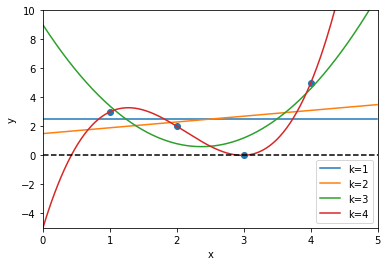

In [6]:
#Ans 1a


para1_1 = fit_para(x,y,k=1)   #models with different k
para1_2 = fit_para(x,y,k=2)
para1_3 = fit_para(x,y,k=3)
para1_4 = fit_para(x,y,k=4)

#configuration of plot
plt.xlim(0,5)
plt.ylim(-5,10)
plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x,y)   #scatter plot of data

x_value = np.arange(0,5,0.01)   #sample x points to generate linear regression
plt.plot(x_value, graph_yvalue(para1_1,k=1))
plt.plot(x_value, graph_yvalue(para1_2,k=2))
plt.plot(x_value, graph_yvalue(para1_3,k=3))
plt.plot(x_value, graph_yvalue(para1_4,k=4))

plt.axhline(y=0, color='k', linestyle='--')   #axis line

plt.legend(labels = ['k=1','k=2','k=3','k=4'])
plt.show()

In [7]:
#Ans 1b


para1 = fit_para(x,y,1)   #k=1
para2 = fit_para(x,y,2)   #k=2
para3 = fit_para(x,y,3)   #k=3
para4 = fit_para(x,y,4)   #k=4

print('k=1',para1,'\n','k=2',para2,'\n','k=3',para3,'\n','k=4',para4)

k=1 [2.5] 
 k=2 [1.5 0.4] 
 k=3 [ 9.  -7.1  1.5] 
 k=4 [-5.         15.16666667 -8.5         1.33333333]


In [19]:
#calculate MSE

def mse(m,n,k):
    feature_map = model(m,k)   #feature_map can include test data
    sum_of_square = 0
    para = fit_para(x,y,k)   #para vector only rely on training data
    for i in range (len(m)):
        sum_of_square += np.square(n[i] - np.matmul(feature_map[i], para))
    return sum_of_square/len(m)


In [20]:
#Ans 1c

mse1 = mse(x,y,1)
mse2 = mse(x,y,2)
mse3 = mse(x,y,3)
mse4 = mse(x,y,4)
print('k=1',mse1,'\n','k=2',mse2,'\n','k=3',mse3,'\n','k=4',mse4)

k=1 3.25 
 k=2 3.0500000000000003 
 k=3 0.7999999999999998 
 k=4 1.4662163214890336e-25
